# Problem 2

## Problem Description
In this problem you will train a neural network to classify points with features $x_0$ and $x_1$ belonging to one of three classes, indicated by the label $y$. The structure of your neural network is up to you, but you must describe the structure of your network, training parameters, and report an accuracy for your fitted model on the provided data.

Fill out the notebook as instructed, making the requested plots and printing necessary values. 

*You are welcome to use any of the code provided in the lecture activities.*

#### Summary of deliverables:

- Visualization of provided data
- Visualization of trained model with provided data
- Trained model accuracy
- Discussion of model structure and training parameters

#### Imports and Utility Functions:

In [7]:
import torch
import torch.nn as nn
from torch import optim, nn
import torch.nn.functional as F
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def dataGen():
    # random_state = 0 set so generated samples are identical
    x, y = datasets.make_blobs(n_samples = 100, n_features = 2, centers = 3, random_state = 0)
    return x, y

def visualizeModel(model):
    # Get data
    x, y = dataGen()
    # Number of data points in meshgrid
    n = 100
    # Set up evaluation grid
    x0 = torch.linspace(min(x[:,0]), max(x[:,0]),n)
    x1 = torch.linspace(min(x[:,1]), max(x[:,1]),n)
    X0, X1 = torch.meshgrid(x0, x1, indexing = 'ij')
    Xgrid = torch.vstack((X0.flatten(),X1.flatten())).T
    Ypred = torch.argmax(model(Xgrid), dim = 1)
    # Plot data
    plt.scatter(x[:,0], x[:,1], c = y, cmap = ListedColormap(['red','blue','magenta']))
    # Plot model
    plt.contourf(Xgrid[:,0].reshape(n,n), Xgrid[:,1].reshape(n,n), Ypred.reshape(n,n), cmap = ListedColormap(['red', 'blue', 'magenta']), alpha = 0.15)
    plt.xlabel('$x_0$')
    plt.ylabel('$x_1$')
    plt.show()

## Generate and visualize the data
Use the `dataGen()` function to generate the x and y data, then visualize with a 2D scatter plot, coloring points according to their labels.

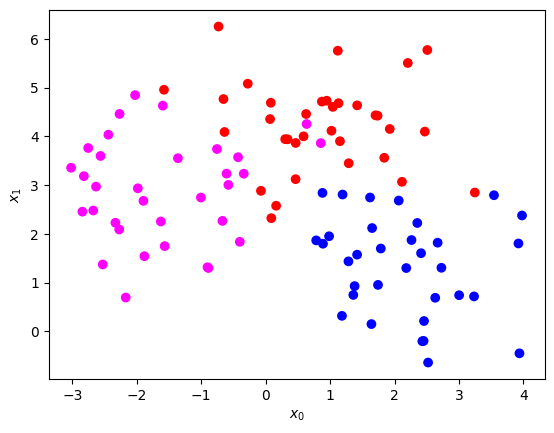

In [19]:
x, y = dataGen()
def getArray(index):
    arr = np.zeros(3)
    arr[index] = 1
    return arr
y_new = np.array([getArray(i) for i in y])

plt.scatter(x[:,0], x[:,1], c = y, cmap = ListedColormap(['red','blue','magenta']))
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.show()


## Create and train a neural network using PyTorch
Choice of structure and training parameters are entirely up to you, however you will need to provide reasoning for your choices. An accuracy of 0.9 or more is reasonable. 

Hint: think about the number out nodes in your output layer and choice of output layer activation function for this multi-class classification problem.

Epoch 0 of 500... 	Average loss: 1.1066259145736694 	Accuracy: 0.33000001311302185
Epoch 50 of 500... 	Average loss: 0.8481236100196838 	Accuracy: 0.6200000047683716
Epoch 100 of 500... 	Average loss: 0.6446115970611572 	Accuracy: 0.9200000166893005
Epoch 150 of 500... 	Average loss: 0.6057852506637573 	Accuracy: 0.9599999785423279
Epoch 200 of 500... 	Average loss: 0.5867579579353333 	Accuracy: 0.9700000286102295
Epoch 250 of 500... 	Average loss: 0.5827810764312744 	Accuracy: 0.9700000286102295
Epoch 300 of 500... 	Average loss: 0.5734541416168213 	Accuracy: 0.9800000190734863
Epoch 350 of 500... 	Average loss: 0.5717936158180237 	Accuracy: 0.9800000190734863
Epoch 400 of 500... 	Average loss: 0.5716751217842102 	Accuracy: 0.9800000190734863
Epoch 450 of 500... 	Average loss: 0.5716283321380615 	Accuracy: 0.9800000190734863


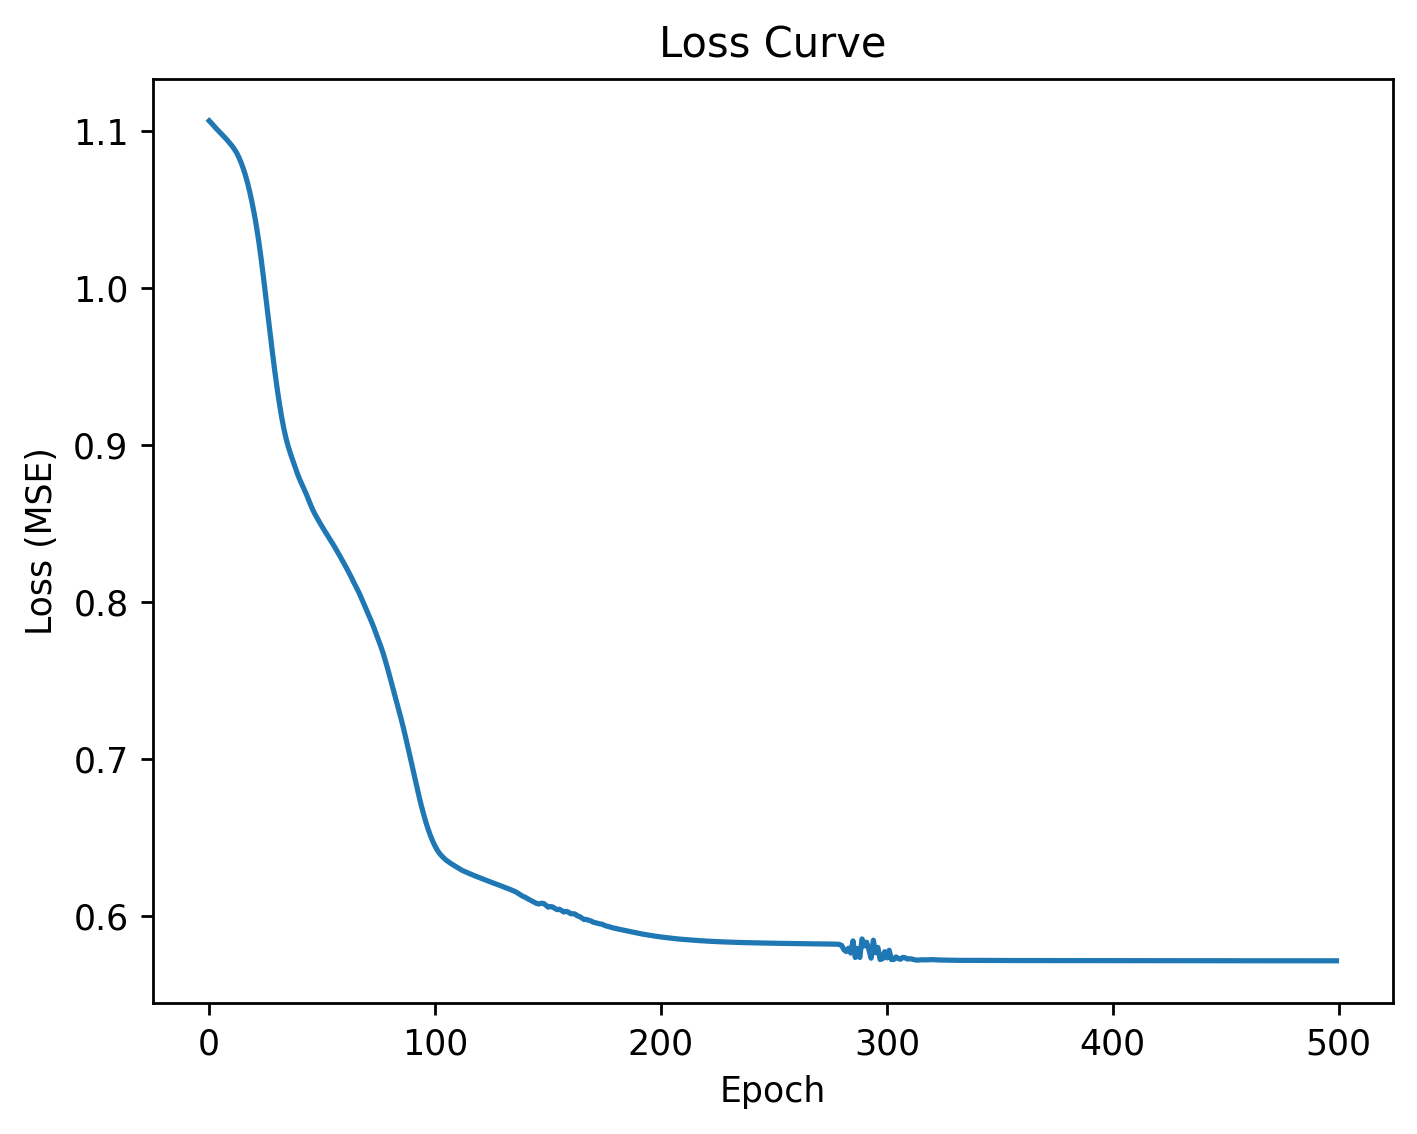

In [28]:
class NNet(nn.Module):
    def __init__(self, N_hidden=6, N_in=2, N_out=3):
        super().__init__()
        self.seq = nn.Sequential(
            nn.Linear(N_in, N_hidden),
            nn.LeakyReLU(),
            nn.Linear(N_hidden, N_hidden),
            nn.LeakyReLU(),
            nn.Linear(N_hidden, N_hidden),
            nn.LeakyReLU(),
            nn.Linear(N_hidden, N_hidden),
            nn.LeakyReLU(),
            nn.Linear(N_hidden, N_out),
            nn.Softmax()
        )

    def forward(self,x):
        return self.seq(x)
    
x = torch.Tensor(x)
y = torch.Tensor(y.reshape(-1,1))
y_new = torch.Tensor(y_new)
    
model = NNet(N_hidden = 10)
loss_curve = []
accuracy = []

# Training parameters: Learning rate, number of epochs, loss function
# (These can be tuned)
lr = 0.005
epochs = 500
loss_fcn = nn.CrossEntropyLoss()

# Set up optimizer to optimize the model's parameters using Adam with the selected learning rate
opt = optim.Adam(params = model.parameters(), lr=lr)

# Training loop
for epoch in range(epochs):
    out = model(x) # Evaluate the model
    
    loss = loss_fcn(out,y_new)

    loss_curve.append(loss.item())
    acc = out.max(axis=1).indices == y.squeeze(1)

    # Print loss progress info 25 times during training
    if epoch % int(epochs / 10) == 0:
        print(f"Epoch {epoch} of {epochs}... \tAverage loss: {loss.item()} \tAccuracy: {acc.float().sum() / y.squeeze(1).shape[0]}")

    # Move the model parameters 1 step closer to their optima:
    opt.zero_grad()
    loss.backward()
    opt.step()

plt.figure(dpi=250)
plt.plot(loss_curve)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Loss Curve')
plt.show()


## Visualize your trained model
Use the provided `visualizeModel()` function by passing in your trained model to see your models predicted function compared to the provided data

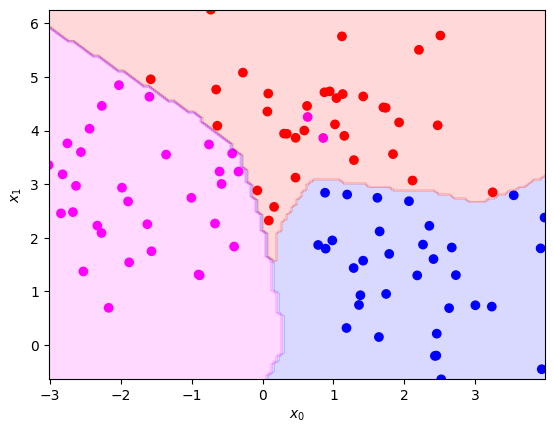

In [29]:
visualizeModel(model)


## Discussion
Report the accuracy of your trained model on the generated data. Discuss the structure of your network, including the number and size of hidden layers, choice of activation function, loss function, optimizer, learning rate, number of training epochs.

*YOUR ANSWER GOES HERE*
- Accruacy is 0.9800000190734863..
- I structure my network as 4 layers, each layer has 6 nodes, it takes 2 inputs and returns 3 outputs. It shows good enough for the accruacy requirement of 0.9. 
- I choose LeakyReLU function as the hidden layer activation function, andSoftmaxd for the ou put layer activation function. This way it does not have vanishing gradients during training.
- I choose cross entropy as the loss function since it is a multi-class classification problem.
- The Adam optimizer was used as the optimizer because it provides a varying gradient to speed up or slow down training when necessary.
- Learning rate is 0.005 which speed up training enough while also producing accurate and not over fitting results.
- I used 500 epochs because it turns out after 250 epochs, the results start convergence. 
